In [156]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
#importing the dataset from Netlogo runs
df = pd.read_csv("../Netlogo/output/normal_run-table.csv",skiprows=6)
#setting the index to run numbers, removing unnecessary columns
df = df.set_index("[run number]").drop(columns=["size-of-std","avg_migrant_income","random-attributes?","housing-market-inflation?","aggregate-cluster-size","migrant-multiplier"])

In [56]:
avg_price = pd.DataFrame()
i = 0
for r in df[df["[step]"]==40]["KPI-avg_price"]:
    avg_price[i] = r.replace("[","").replace("]","").split(" ")
    i = i + 1

In [58]:
avg_price = avg_price.T

In [154]:
avg_price

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,94,526948.796,99,257658.58973684208,49,635114.7,84,443290.5125,38,176177.84445606693,...,21,207431.09038461535,52,462310.7063084112,51,535462.8125,103,156569.00000000003,112,84645
1,66,206315.92402061855,89,307914.2,75,835558.4346153847,10,266610.84575289575,36,193441.11111111112,...,16,170557.28102150536,88,0,4,356843.28942307696,84,565598.33,8,340212.38513513515
2,100,408600.26504854363,32,183115.99928366762,54,327823.2098626717,17,176713.19561403507,91,234483.37564102563,...,20,215877.56666666668,84,448102.95749999996,73,466563.50797872344,99,183583.68809523806,35,240601.04490566035
3,101,189332.152276867,64,212404.44210526315,116,216412,99,260359.326873385,15,166840.32115384616,...,46,364843.15131578944,8,334550.75851063826,91,221966.9826108374,84,440839.70526315784,103,76364
4,115,0,31,225886.28710045663,95,440775.4774590164,83,191668.48061643835,88,245417,...,93,658453.18,45,522271.5807692308,109,67716,104,214291.61111111112,71,478687.60892857146
5,33,199042.745,18,189233.17871253405,68,400329.25625,2,298911.441091314,83,185124.67721202003,...,24,222995.61056581986,17,192488.75850253808,113,699225.2725806452,11,342126.95159605343,61,291616.5798780488
6,91,237791.97406616862,3,390761.4333333333,23,204749.52105263158,99,241609.26760563382,121,496783.36089743586,...,93,607242.8738095238,52,447796.97219626163,7,624089.7260714285,35,255125.3490458015,114,317145
7,23,207427.1230952381,61,304276.4775510204,47,463860.3684834123,97,325638.71957364335,7,635463.9236,...,69,247570.24444444443,121,504665.291025641,115,0,88,309153,102,347816.6607142857
8,18,186585.86760899183,37,201657.22784810126,25,225169.55538922155,36,204745.26111111112,12,642994.3574999999,...,17,204406.92347715737,42,414890.3956521739,53,365823.1387755102,119,359135.65769230766,22,191054.26558089035
9,63,280276.67884615384,98,306179.578256513,67,517192.1333333333,115,172778.65,87,356014.2181262729,...,85,247806.44736024845,88,151207,8,240091.91162046907,55,366212.8090943683,111,69617


In [110]:
i = 0
avg_price_df = pd.DataFrame(columns=["neighborhood","value","run"])
for c in range(114):
    for r in range(16):
        avg_price_df.loc[i] = [int(avg_price[2*c][r]), round(float(avg_price[2*c+1][r])) , r]
        i += 1

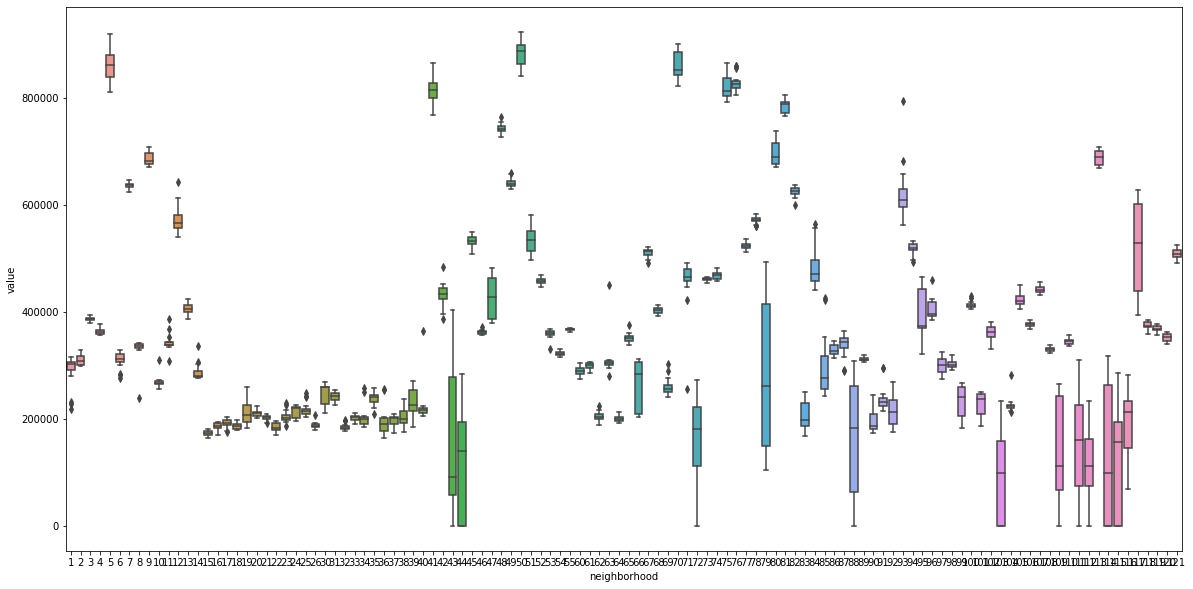

In [149]:
plt.figure(figsize=(20,10))
sns.boxplot(y="value",x="neighborhood",data=avg_price_df)

In [160]:
fig = px.box(avg_price_df, x='neighborhood', y='value',points="outliers")
fig.show()